In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR

In [2]:
df = pd.read_csv('../data/preprocessed_data.csv')
df.head()

,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,text_popularity,days_uploaded,title_length,description_length,tags_count,channel_title_mean_views,channel_title_max_views,channel_title_min_views,channel_title_mean_comments,channel_title_max_comments,channel_title_min_comments
0,22,1514614.0,156908.0,696.438236,35313,1958.0,1,2,1,34,361,143,1.713608e+06,3958226.0,480970.0,18033.333333,45574,1471
1,20,2381688.0,146739.0,1095.129578,16549,566.0,1,0,1,60,715,448,2.419552e+06,7003748.0,402885.0,8378.864811,27451,1324
2,24,2038853.0,353787.0,937.489807,40221,4918.0,3,0,1,53,513,384,2.159255e+06,6582365.0,344173.0,18964.178862,207849,1764
3,10,496771.0,23251.0,228.421445,7647,5088.0,1,1,1,56,762,250,1.111062e+06,4274628.0,124775.0,9658.552326,41789,687
4,26,1123889.0,45802.0,516.778052,2196,4004.0,1,0,1,55,2493,415,5.394150e+05,2400821.0,182202.0,1524.144578,4867,384


In [3]:
def apply_log(df, column_names):
    for column_name in column_names:
        df[column_name] = df.apply(lambda row: np.log2(row[column_name]) if row[column_name] != 0 else row[column_name], axis=1)

In [4]:
numerical_features = ['view_count', 'dislikes', 'comment_count', 'days_uploaded', 'title_length', 'channel_title_mean_views', 'channel_title_min_views', 'channel_title_max_views', 'tags_count', 'channel_title_mean_comments', 'channel_title_min_comments', 'channel_title_max_comments']
categorical_features = ['categoryId', 'image_popularity', 'text_popularity']
target = 'likes'

In [5]:
numerical_features.append(target)
apply_log(df, numerical_features)
numerical_features.remove(target)

In [6]:
features = []
features.extend(numerical_features)
features.extend(categorical_features)

In [7]:
X = df[features]
X

,view_count,dislikes,comment_count,days_uploaded,title_length,channel_title_mean_views,channel_title_min_views,channel_title_max_views,tags_count,channel_title_mean_comments,channel_title_min_comments,channel_title_max_comments,categoryId,image_popularity,text_popularity
0,20.530519,9.443852,15.107912,0.000000,5.087463,20.708606,18.875587,21.916423,7.159871,14.138378,10.522582,15.475923,22,1,2
1,21.183553,10.096886,14.014456,0.000000,5.906891,21.206308,18.620009,22.739696,8.807355,13.032539,10.370687,14.744571,20,1,0
2,20.959326,9.872659,15.295661,0.000000,5.727920,21.042102,18.392774,22.650175,8.584963,14.210989,10.784635,17.665176,24,3,0
3,18.922221,7.835554,12.900678,0.000000,5.807355,20.083507,16.928969,22.027367,7.965784,13.237591,9.424166,15.350836,10,1,1
4,20.100068,9.013401,11.100662,0.000000,5.781360,19.041036,17.475179,21.195096,8.696968,10.573784,8.584963,12.248817,26,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245898,19.103856,8.017189,10.831307,2.807355,5.087463,19.240278,17.561907,20.213334,8.005625,12.432614,10.333155,13.854771,23,1,1
245899,21.218798,10.132131,12.508785,2.807355,5.321928,21.845931,18.395120,23.772112,4.700440,14.775480,10.736402,16.271682,20,1,2
245900,18.855541,6.518421,8.422065,2.584963,6.339850,19.662608,16.964792,22.307505,8.826548,10.471738,6.686501,13.147523,17,2,3
245901,19.617442,8.530775,10.945444,2.584963,5.554589,23.416360,18.060005,25.406218,3.700440,14.469762,10.288866,16.320007,24,1,2


In [8]:
y = df[target]
y

0         17.259559
1         17.162893
2         18.432522
3         14.505005
4         15.483123
            ...    
245898    16.072572
245899    16.800205
245900    12.484319
245901    14.850382
245902    15.707009
Name: likes, Length: 245903, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((196722, 15), (49181, 15), (196722,), (49181,))

In [10]:
model = LinearSVR(random_state=42,max_iter=200000)
model.fit(X_train, y_train)

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(max_iter=200000, random_state=42)

In [11]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
pred_train, pred_test

(array([16.68817625, 17.19033564, 16.75159391, ..., 16.09329483,
        15.12473672, 14.66619513]),
 array([14.36472287, 15.03392263, 14.66240874, ..., 12.18437027,
        15.16585576, 14.96275323]))

In [12]:
print(f"Train RMSE = {np.sqrt(mean_squared_error(y_train, pred_train))}")
print(f"Test RMSE = {np.sqrt(mean_squared_error(y_test, pred_test))}")
print(f"Train R2 = {np.sqrt(r2_score(y_train, pred_train))}")
print(f"Test R2 = {np.sqrt(r2_score(y_test, pred_test))}")

Train RMSE = 0.9400426478848359
Test RMSE = 0.6191660108327858
Train R2 = 0.8810878133561482
Test R2 = 0.9495075070419827


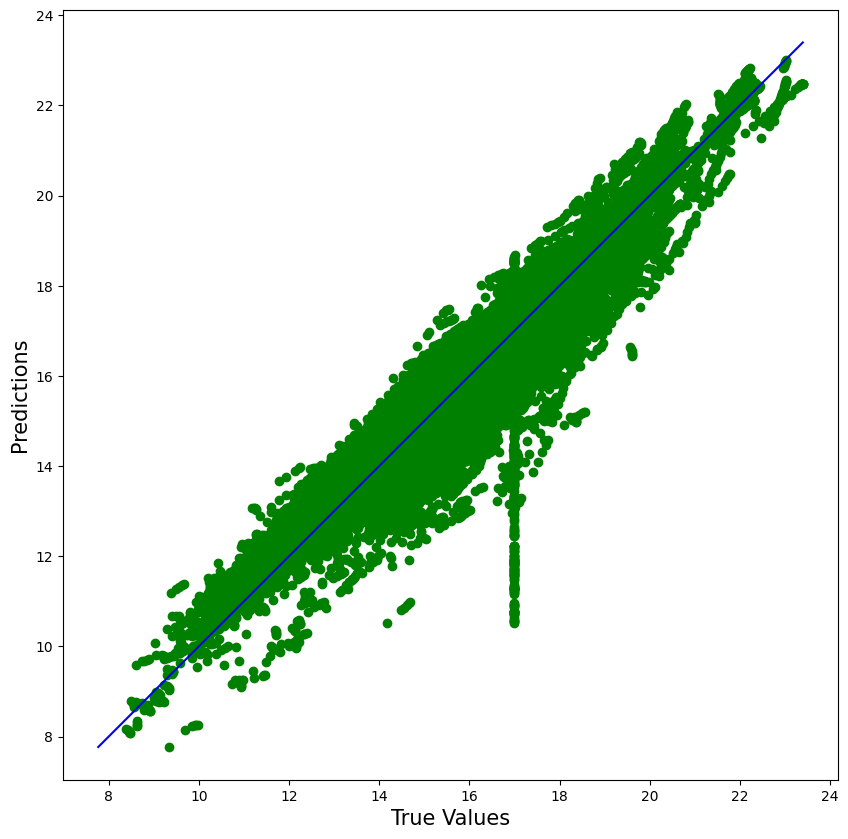

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred_test, c='green')

p1 = max(max(pred_test), max(y_test))
p2 = min(min(pred_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Podaci koji se nalaze u preprocessed_data zauzimaju jako veliki opseg pa je model davao jako loše rezultate. Zbog toga prvo je pokušana standardizacija ali model nije davao mnogo bolje rezultate. Na kraju se logaritmovanje pokazalo kao puno bolje rešenje.

Najbolji rezultati ostvareni su korišćenjem skoro svih kolona. Starost kanala i dužina opisa video snimka su izbačeni zbog lošeg uticaja na predikciju. 

Što se tiče parametara modela, pokušane su razne kombinacije. Menjana je vrednost C koeficijenta. Za veće od default (1.0) model je davao lošije rezulatate a manja vrednost nije uticala, tačnost je ostala ista. 
Max_iter parametar imao je vrednosti 10000, 50000, 100000, 200000 i 300000. Za 200000 se pokazao najbolje, 300000 nije promenilo ništa u odnosu na 200000, dok manji broj iteracija daju nešto lošiji rezultat.
Episol nije menjan. 
Takođe promena tol parametra (tolerancija) se uopšte nije osetila.

Korišćeni su i drugi kerneli ali daju identičan rezulatat samo za veće vreme. Poly kernel daje dobar rezulata samo ako je degree = 1 a to znači linearan problem.
